In [1]:
!pip install smote-variants

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 MB 413.9 kB/s eta 0:00:00m eta 0:00:010:00:25
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 285.5 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 298.2 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 263.1 kB/s eta 0:00:001m260.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 273.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 245.6 kB/s eta 0:00:000:00:01m eta 0:00:01
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-

In [43]:
data = pd.read_csv('data/experimental_df.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [44]:
X = train_data.iloc[:,1:-1].values
y = train_data.iloc[:, -1:].values.flatten()

In [156]:
import smote_variants as sv
import sklearn.datasets as datasets

oversampler= sv.MulticlassOversampling(oversampler='distance_SMOTE',
                                      oversampler_params={'random_state': 1})

X_samp, y_samp = oversampler.sample(X, y)

2023-07-16 23:17:10,118:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2023-07-16 23:17:10,119:INFO:MulticlassOversampling: Sampling minority class with label: 2.0
2023-07-16 23:17:10,120:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 1, 'class_name': 'distance_SMOTE'}")
2023-07-16 23:17:10,121:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-07-16 23:17:10,122:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-07-16 23:17:10,134:INFO:distance_SMOTE: simplex sampling with n_dim 2
2023-07-16 23:17:10,136:INFO:MulticlassOversampling: Sampling minority class with label: 0.0
2023-07-16 23:17:10,137:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.

In [157]:
print(len(X))
print(len(X_samp))

213
279


In [158]:
data2 = pd.DataFrame(data=X_samp, columns=['ball_control', 'Dribbling', 'Marking', 'Slide_Tackle',
       'Stand_Tackle', 'Aggression', 'Reactions', 'Att_Position',
       'Interceptions', 'Vision', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Stamina', 'Strength', 'Balance', 'Sprint_Speed', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'FK_Acc',
       'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Reflexes', 'Height', 'Weight', 'Age', '1Quantity',
       '2Quantity'])
data2['Winner'] = y_samp

In [159]:
data.describe()

,Unnamed: 0,ball_control,Dribbling,Marking,Slide_Tackle,Stand_Tackle,Aggression,Reactions,Att_Position,Interceptions,...,GK_Diving,GK_Handling,GK_Kicking,GK_Reflexes,Height,Weight,Age,1Quantity,2Quantity,Winner
count,267.000000,267.000000,267.000000,267.000000,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000,...,2.670000e+02,267.000000,267.000000,267.000000,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,133.000000,0.001124,-0.001124,-0.003371,0.000375,6.653022e-18,-0.003745,0.000375,0.001498,-0.001498,...,6.653022e-18,0.001873,-0.003371,-0.000375,0.002247,3.326511e-18,0.003745,7.775281,15.397004,1.018727
std,77.220464,1.003134,1.001859,1.000464,1.003509,9.997368e-01,1.000745,1.003284,0.998870,1.003039,...,9.993231e-01,0.999904,1.000314,1.002347,1.002176,9.987210e-01,1.001571,2.688402,4.780096,0.758179
min,0.000000,-10.300000,-8.500000,-3.700000,-7.900000,-7.900000e+00,-7.700000,-10.600000,-9.100000,-6.800000,...,-4.100000e+00,-4.000000,-3.500000,-4.200000,-11.500000,-1.090000e+01,-10.200000,0.000000,1.000000,0.000000
25%,66.500000,-0.300000,-0.300000,-0.250000,-0.400000,-4.000000e-01,-0.400000,-0.200000,-0.400000,-0.400000,...,-5.000000e-01,-0.500000,-0.600000,-0.600000,0.000000,-1.000000e-01,-0.300000,6.000000,12.500000,0.000000
50%,133.000000,0.100000,0.100000,0.200000,0.100000,1.000000e-01,0.100000,0.100000,0.100000,0.100000,...,1.000000e-01,0.100000,0.100000,0.100000,0.100000,1.000000e-01,0.100000,9.000000,17.000000,1.000000
75%,199.500000,0.500000,0.450000,0.500000,0.500000,5.000000e-01,0.500000,0.300000,0.500000,0.500000,...,6.000000e-01,0.550000,0.550000,0.500000,0.200000,3.000000e-01,0.400000,10.000000,19.000000,2.000000
max,266.000000,2.600000,2.900000,2.000000,3.500000,3.500000e+00,3.800000,2.000000,3.700000,3.400000,...,3.600000e+00,4.200000,4.200000,4.500000,0.500000,1.200000e+00,2.500000,11.000000,22.000000,2.000000


In [160]:
data2.describe()

,ball_control,Dribbling,Marking,Slide_Tackle,Stand_Tackle,Aggression,Reactions,Att_Position,Interceptions,Vision,...,GK_Diving,GK_Handling,GK_Kicking,GK_Reflexes,Height,Weight,Age,1Quantity,2Quantity,Winner
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,0.038686,0.018037,0.003188,0.049707,0.043809,0.017419,0.051458,0.027886,0.055724,0.029023,...,0.003045,0.008050,-0.018647,-0.007549,0.043426,0.028584,0.046145,7.841011,15.557691,1.000000
std,0.756266,0.840553,0.957854,0.908256,0.923772,0.888943,0.738858,0.816662,0.918990,0.771096,...,0.960037,0.972139,0.956090,0.964608,0.706366,0.720653,0.724708,2.630679,4.680168,0.817964
min,-6.500000,-6.900000,-3.600000,-7.900000,-7.900000,-7.100000,-8.300000,-4.700000,-6.300000,-7.000000,...,-4.100000,-4.000000,-3.500000,-4.200000,-11.500000,-10.600000,-8.300000,0.000000,1.000000,0.000000
25%,-0.300000,-0.300000,-0.300000,-0.300000,-0.400000,-0.300000,-0.160124,-0.404420,-0.300000,-0.300000,...,-0.500000,-0.590888,-0.600000,-0.555809,0.000000,-0.100000,-0.200000,6.000000,13.000000,0.000000
50%,0.100000,0.100000,0.200000,0.200000,0.100000,0.017401,0.100000,0.100000,0.172216,0.013208,...,0.000000,0.002586,0.041834,0.100000,0.100000,0.100000,0.052207,9.000000,17.000000,1.000000
75%,0.400000,0.400000,0.500000,0.503900,0.500290,0.442797,0.300000,0.500000,0.496819,0.400000,...,0.604284,0.641401,0.500000,0.543213,0.178793,0.300000,0.398613,10.000000,19.000000,2.000000
max,2.600000,2.900000,2.000000,3.500000,3.500000,3.800000,2.000000,3.700000,3.400000,2.900000,...,3.600000,4.200000,4.200000,4.500000,0.500000,1.000000,2.200000,11.000000,22.000000,2.000000


In [161]:
#X = train_data.iloc[:,1:-1].values
#y = train_data.iloc[:, -1:].values.flatten()

/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.4444444444444444


<AxesSubplot: >

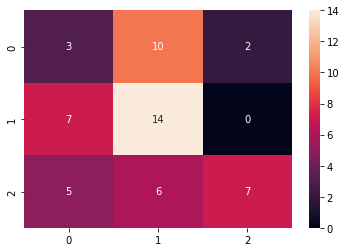

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix)
import seaborn as sns

model = AdaBoostClassifier(n_estimators=400, random_state=1)
model.fit(train_data.iloc[:,1:-1], train_data.iloc[:, -1:])

y_pred = model.predict(test_data.iloc[:,1:-1])
accuracy = accuracy_score(test_data.iloc[:, -1:], y_pred)
print('accuracy: ', accuracy)

cm = confusion_matrix(test_data.iloc[:, -1:], y_pred)
sns.heatmap(cm, annot=True, fmt='d')

accuracy:  0.46296296296296297


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


<AxesSubplot: >

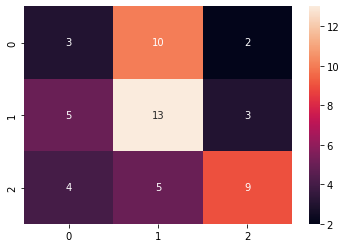

In [163]:
model = AdaBoostClassifier(n_estimators=400, random_state=1)
model.fit(X_samp, y_samp)

y_pred = model.predict(test_data.iloc[:,1:-1])
accuracy = accuracy_score(test_data.iloc[:, -1:], y_pred)
print('accuracy: ', accuracy)

cm = confusion_matrix(test_data.iloc[:, -1:], y_pred)
sns.heatmap(cm, annot=True, fmt='d')

# depending on the random_state the accuracy goes up or down, I dont find it appropriate to use it